In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [63]:
df=pd.read_csv('IMDb-Movies-India.csv',encoding='latin1')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [67]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [69]:
df['Year'] = df['Year'].astype(str).str.replace(r'\D', '', regex=True)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'] = df['Year'].fillna(df['Year'].median()).astype(int)
label = LabelEncoder()
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = df[col].astype(str)
    df[col] = label.fit_transform(df[col])

In [71]:
df.dropna(inplace=True)

In [73]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,299,7.0,8,1548,3280,4790,527
3,#Yaaram,2019,110 min,228,4.4,35,3319,2917,1504,4020
5,...Aur Pyaar Ho Gaya,1997,147 min,197,4.7,827,3800,895,123,3829
6,...Yahaan,2005,142 min,366,7.4,"1,086",4993,1698,2359,4762
8,?: A Question Mark,2012,82 min,418,5.6,326,305,4654,2482,1851


In [75]:
df=df.drop(columns=['Duration','Votes'],errors='ignore')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int64  
 2   Genre     5851 non-null   int64  
 3   Rating    5851 non-null   float64
 4   Director  5851 non-null   int64  
 5   Actor 1   5851 non-null   int64  
 6   Actor 2   5851 non-null   int64  
 7   Actor 3   5851 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 411.4+ KB


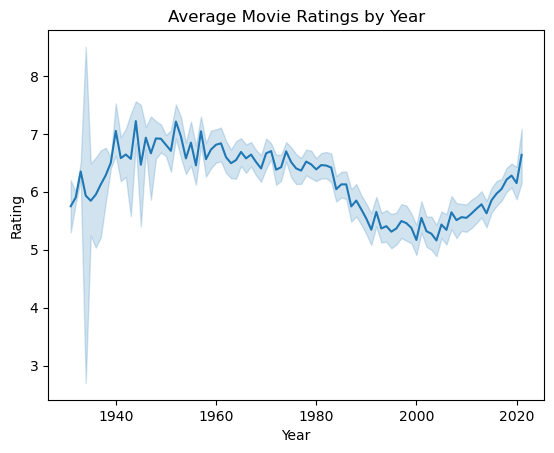

In [79]:
sns.lineplot(x='Year', y='Rating',data=df)
plt.title('Average Movie Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

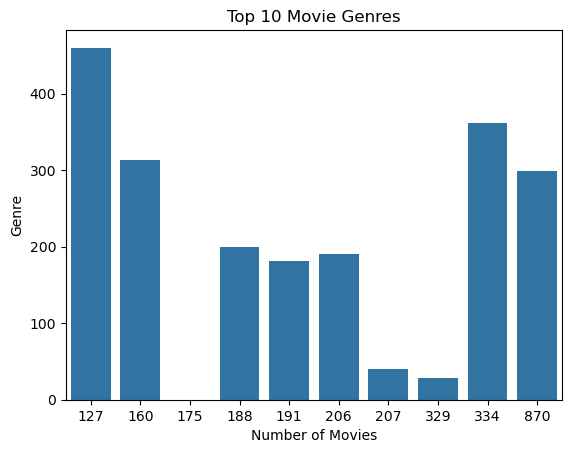

In [81]:
genres = df['Genre'].value_counts(ascending=False).head(10)
sns.barplot(x=genres.values, y=genres.index)
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

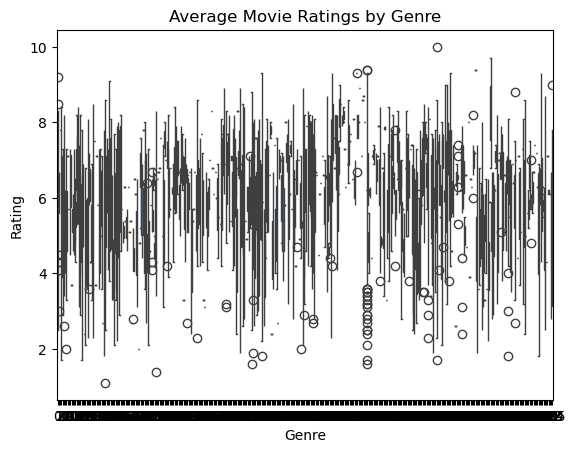

In [83]:
sns.boxplot(x='Genre', y='Rating',data=df)
plt.title('Average Movie Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

In [85]:
Genre_Average_Rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_Average_Rating'] =Genre_Average_Rating
df

,Name,Year,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating
1,#Gadhvi (He thought he was Gandhi),2019,299,7.0,1548,3280,4790,527,6.420575
3,#Yaaram,2019,228,4.4,3319,2917,1504,4020,5.716822
5,...Aur Pyaar Ho Gaya,1997,197,4.7,3800,895,123,3829,6.242222
6,...Yahaan,2005,366,7.4,4993,1698,2359,4762,6.820000
8,?: A Question Mark,2012,418,5.6,305,4654,2482,1851,5.477778
...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,299,6.1,3003,4478,3758,2983,6.420575
15494,Zubeidaa,2001,169,6.2,5032,1866,3402,2163,6.950000
15503,Zulm Ki Zanjeer,1989,29,5.8,4416,990,1596,3135,5.743465
15505,Zulmi,1999,40,4.5,2499,227,4532,519,5.526087


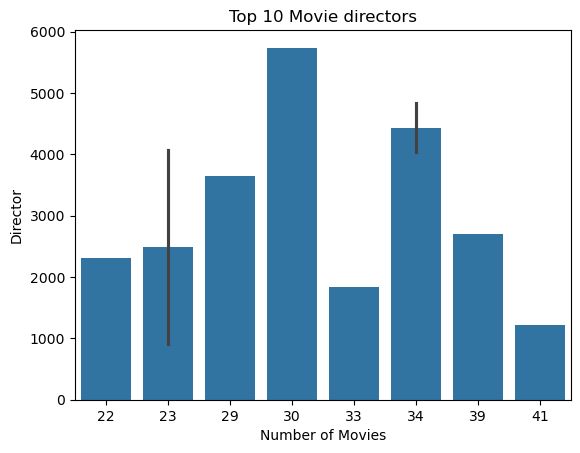

In [87]:
directors = df['Director'].value_counts(ascending=False).head(10)
sns.barplot(x=directors.values, y=directors.index)
plt.title('Top 10 Movie directors')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

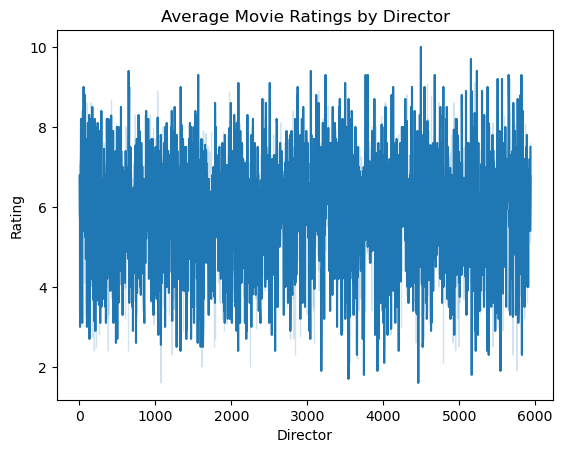

In [89]:
sns.lineplot(x='Director', y='Rating',data=df)
plt.title('Average Movie Ratings by Director')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.show()

In [90]:
Director_Average_Rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_Average_Rating'] =Director_Average_Rating
df

,Name,Year,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating
1,#Gadhvi (He thought he was Gandhi),2019,299,7.0,1548,3280,4790,527,6.420575,7.000000
3,#Yaaram,2019,228,4.4,3319,2917,1504,4020,5.716822,4.400000
5,...Aur Pyaar Ho Gaya,1997,197,4.7,3800,895,123,3829,6.242222,5.313333
6,...Yahaan,2005,366,7.4,4993,1698,2359,4762,6.820000,7.383333
8,?: A Question Mark,2012,418,5.6,305,4654,2482,1851,5.477778,5.600000
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,299,6.1,3003,4478,3758,2983,6.420575,6.100000
15494,Zubeidaa,2001,169,6.2,5032,1866,3402,2163,6.950000,7.250000
15503,Zulm Ki Zanjeer,1989,29,5.8,4416,990,1596,3135,5.743465,6.270000
15505,Zulmi,1999,40,4.5,2499,227,4532,519,5.526087,5.225000


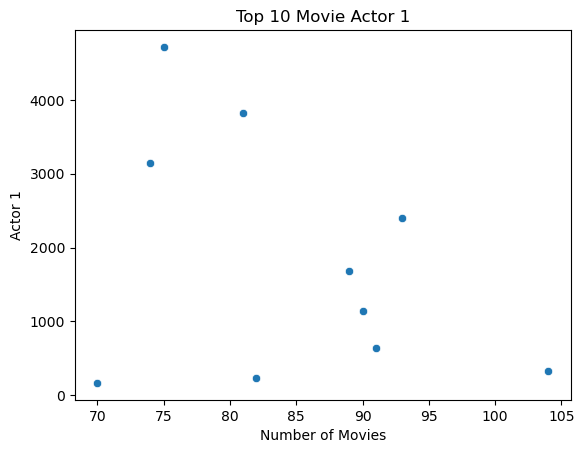

In [91]:
actors = df['Actor 1'].value_counts(ascending=False).head(10)
sns.scatterplot(x=actors.values, y=actors.index)
plt.title('Top 10 Movie Actor 1')
plt.xlabel('Number of Movies')
plt.ylabel('Actor 1')
plt.show()

In [92]:
Actor1_Average_Rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_Average_Rating'] =Actor1_Average_Rating
df

,Name,Year,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating
1,#Gadhvi (He thought he was Gandhi),2019,299,7.0,1548,3280,4790,527,6.420575,7.000000,6.850000
3,#Yaaram,2019,228,4.4,3319,2917,1504,4020,5.716822,4.400000,5.420000
5,...Aur Pyaar Ho Gaya,1997,197,4.7,3800,895,123,3829,6.242222,5.313333,4.788889
6,...Yahaan,2005,366,7.4,4993,1698,2359,4762,6.820000,7.383333,5.435000
8,?: A Question Mark,2012,418,5.6,305,4654,2482,1851,5.477778,5.600000,5.600000
...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,299,6.1,3003,4478,3758,2983,6.420575,6.100000,6.725000
15494,Zubeidaa,2001,169,6.2,5032,1866,3402,2163,6.950000,7.250000,4.157143
15503,Zulm Ki Zanjeer,1989,29,5.8,4416,990,1596,3135,5.743465,6.270000,6.307692
15505,Zulmi,1999,40,4.5,2499,227,4532,519,5.526087,5.225000,5.481707


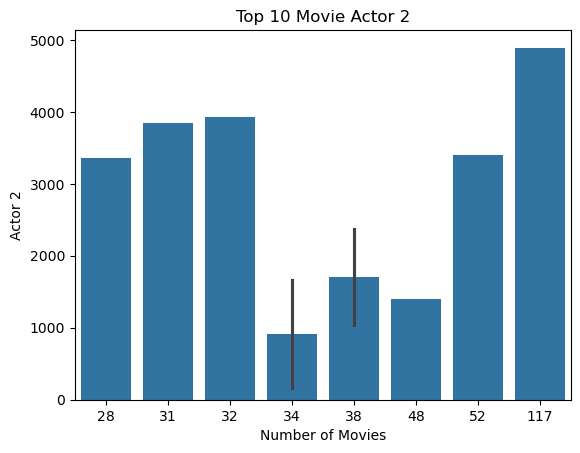

In [97]:
actors = df['Actor 2'].value_counts(ascending=False).head(10)
sns.barplot(x=actors.values, y=actors.index)
plt.title('Top 10 Movie Actor 2')
plt.xlabel('Number of Movies')
plt.ylabel('Actor 2')
plt.show()

In [99]:
Actor2_Average_Rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_Average_Rating'] =Actor2_Average_Rating
df

,Name,Year,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating
1,#Gadhvi (He thought he was Gandhi),2019,299,7.0,1548,3280,4790,527,6.420575,7.000000,6.850000,7.000000
3,#Yaaram,2019,228,4.4,3319,2917,1504,4020,5.716822,4.400000,5.420000,4.400000
5,...Aur Pyaar Ho Gaya,1997,197,4.7,3800,895,123,3829,6.242222,5.313333,4.788889,5.786667
6,...Yahaan,2005,366,7.4,4993,1698,2359,4762,6.820000,7.383333,5.435000,6.933333
8,?: A Question Mark,2012,418,5.6,305,4654,2482,1851,5.477778,5.600000,5.600000,5.883333
...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,299,6.1,3003,4478,3758,2983,6.420575,6.100000,6.725000,6.100000
15494,Zubeidaa,2001,169,6.2,5032,1866,3402,2163,6.950000,7.250000,4.157143,5.823077
15503,Zulm Ki Zanjeer,1989,29,5.8,4416,990,1596,3135,5.743465,6.270000,6.307692,5.800000
15505,Zulmi,1999,40,4.5,2499,227,4532,519,5.526087,5.225000,5.481707,4.640000


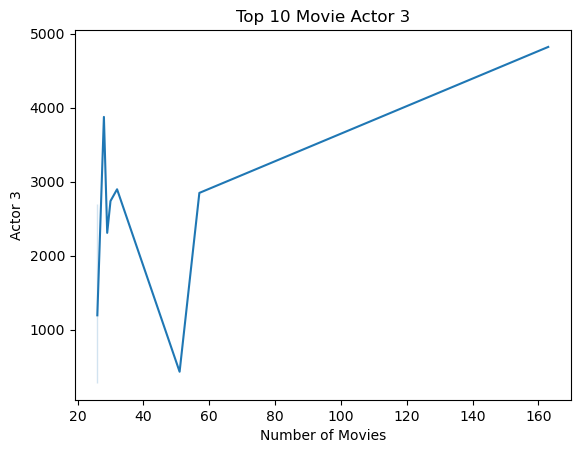

In [101]:
actors = df['Actor 3'].value_counts(ascending=False).head(10)
sns.lineplot(x=actors.values, y=actors.index)
plt.title('Top 10 Movie Actor 3')
plt.xlabel('Number of Movies')
plt.ylabel('Actor 3')
plt.show()

In [103]:
Actor3_Average_Rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_Average_Rating'] =Actor3_Average_Rating
df

,Name,Year,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
1,#Gadhvi (He thought he was Gandhi),2019,299,7.0,1548,3280,4790,527,6.420575,7.000000,6.850000,7.000000,7.000000
3,#Yaaram,2019,228,4.4,3319,2917,1504,4020,5.716822,4.400000,5.420000,4.400000,4.450000
5,...Aur Pyaar Ho Gaya,1997,197,4.7,3800,895,123,3829,6.242222,5.313333,4.788889,5.786667,5.872727
6,...Yahaan,2005,366,7.4,4993,1698,2359,4762,6.820000,7.383333,5.435000,6.933333,6.500000
8,?: A Question Mark,2012,418,5.6,305,4654,2482,1851,5.477778,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,299,6.1,3003,4478,3758,2983,6.420575,6.100000,6.725000,6.100000,5.850000
15494,Zubeidaa,2001,169,6.2,5032,1866,3402,2163,6.950000,7.250000,4.157143,5.823077,5.954545
15503,Zulm Ki Zanjeer,1989,29,5.8,4416,990,1596,3135,5.743465,6.270000,6.307692,5.800000,6.050000
15505,Zulmi,1999,40,4.5,2499,227,4532,519,5.526087,5.225000,5.481707,4.640000,5.737500


In [123]:
x_train,x_test,y_train,y_test = train_test_split(X,y)
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [125]:
X= df[['Year','Genre_Average_Rating','Director_Average_Rating','Actor1_Average_Rating','Actor2_Average_Rating','Actor3_Average_Rating']]
y=df['Rating']

In [127]:
x_train,x_test,y_train,y_test = train_test_split(X,y)
train_data= x_train.join(y_train)
train_data

,Year,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating,Rating
2123,1994,5.624324,6.600000,6.220000,6.650000,6.450000,7.8
8736,2021,6.420575,8.100000,8.100000,8.100000,8.100000,8.1
11288,1986,6.016168,5.128571,5.594340,5.590909,4.930000,3.6
7498,2019,4.116667,2.550000,5.320000,3.233333,4.500000,3.5
5009,1978,6.016168,7.000000,7.000000,6.440000,6.236842,7.0
...,...,...,...,...,...,...,...
14385,1989,5.016667,5.300000,6.183654,5.614286,5.318750,4.9
15264,2004,5.146154,5.000000,3.700000,6.378571,5.525000,3.7
9543,1992,5.511111,5.111765,5.481707,4.300000,4.300000,4.3
6315,1983,5.477966,5.625000,5.926667,5.588889,6.185714,5.8


In [129]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [131]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.4104223130640311
R2 Score: 0.7829874426867909


In [133]:
X = df[['Genre', 'Director','Actor 1','Actor 2','Actor 3']]
y = df['Rating']
x_train, x_test, y_train, y_test = train_test_split(X, y)
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [134]:
print("Random Forest Model trained successfully!")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Random Forest Model trained successfully!
MSE: 1.6924419315243273
R² Score: 0.09734968445981629
